In [1]:
import numpy
import pandas
import scipy.io
from loadData import loadData
import numpy as np, os
from plot_signal import plot_signal

In [2]:
ROOT_PATH = u'C:/Users/cricr/OneDrive - Politecnico di Milano/Università/MASTER/applied AI in Biomedicine/project/train'

# Load Data

In [3]:
ppgs_128, speaks_128, annotations_128, ppgs_250, speaks_250, annotations_250 = loadData(ROOT_PATH)

Loading file: 1/62
Loading file: 2/62
Loading file: 3/62
Loading file: 4/62
Loading file: 5/62
Loading file: 6/62
Loading file: 7/62
Loading file: 8/62
Loading file: 9/62
Loading file: 10/62
Loading file: 11/62
Loading file: 12/62
Loading file: 13/62
Loading file: 14/62
Loading file: 15/62
Loading file: 16/62
Loading file: 17/62
Loading file: 18/62
Loading file: 19/62
Loading file: 20/62
Loading file: 21/62
Loading file: 22/62
Loading file: 23/62
Loading file: 24/62
Loading file: 25/62
Loading file: 26/62
Loading file: 27/62
Loading file: 28/62
Loading file: 29/62
Loading file: 30/62
Loading file: 31/62
Loading file: 32/62
Loading file: 33/62
Loading file: 34/62
Loading file: 35/62
Loading file: 36/62
Loading file: 37/62
Loading file: 38/62
Loading file: 39/62
Loading file: 40/62
Loading file: 41/62
Loading file: 42/62
Loading file: 43/62
Loading file: 44/62
Loading file: 45/62
Loading file: 46/62
Loading file: 47/62
Loading file: 48/62
Loading file: 49/62
Loading file: 50/62
Loading f

# Plots

Text(0.5, 1.0, '128 Signal length distribution')

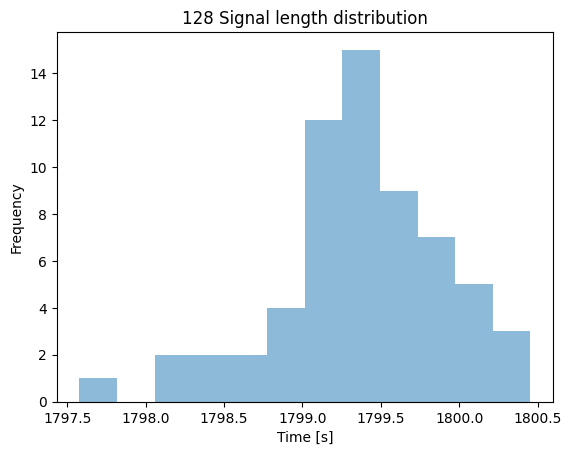

In [4]:
"Plot signal length distribution"
import pandas as pd
fs = 128  # To complete
# Create empty list to contain the different recording lenghts
length_recordings = list()

# Iterate through the different signals stored in "recordings": store signal
# length in senconds.
#We can derive the length by len[]/f
for rec_temp in ppgs_128:
    length_recordings.append(len(rec_temp) / fs)  # To Complete

# Transform to pandas series and plot histogram.
length_rec_s = pd.Series(length_recordings)
ax = length_rec_s.plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("Time [s]")
ax.set_title("128 Signal length distribution")


In [5]:
#Take the first ppg 128 as sample for the next examples
signal_temp = ppgs_128[0]

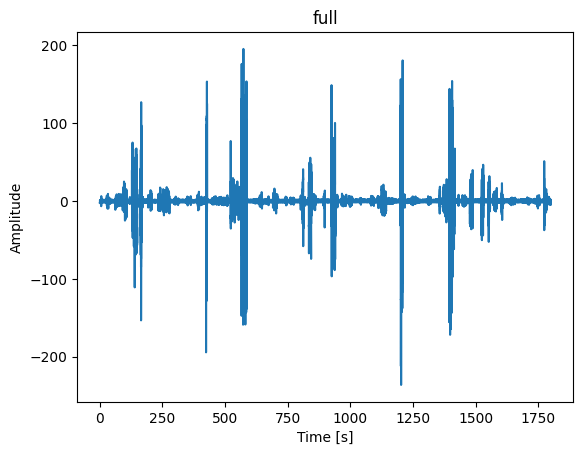

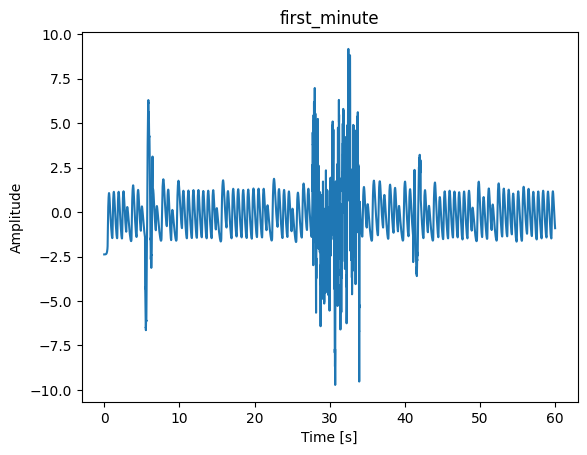

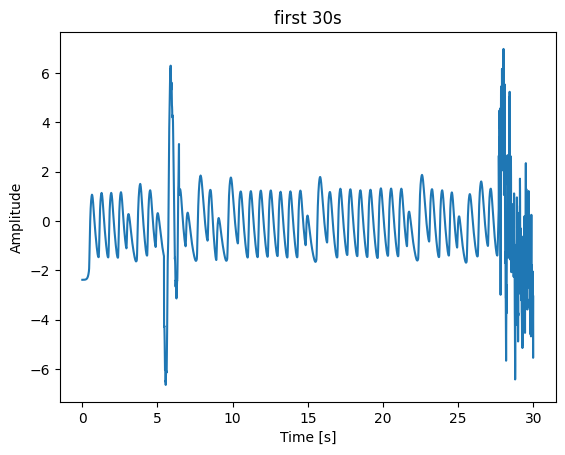

In [6]:
import matplotlib.pyplot as plt
lead = 0

#Plot 1 sample
t = np.arange(0, signal_temp.shape[0]/fs, 1/fs)
plot_signal(t, signal_temp, 'C0', 'full')

#Plot only the first minute 
signal_temp_reduced = signal_temp[:(128*60)]
t2 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 
plot_signal(t2, signal_temp_reduced, 'C0', 'first_minute')

#Plot only the first 30 seconds 
signal_temp_reduced_2 = signal_temp[:(128*30)]
t3 = np.arange(0, signal_temp_reduced_2.shape[0]/fs, 1/fs) 
plot_signal(t3, signal_temp_reduced_2, 'C0', 'first 30s')

#Possiamo apprezzare un disturbo sui 30 secondi

# Pre-processing

In [7]:
# Denoising --> second-order Butterworth filter

signal_temp_unidimensional = np.ravel(signal_temp)
#Let's run it through a standard butterworth bandpass implementation to remove everything < 0.8 and > 3.5 Hz.
b, a = scipy.signal.butter(2, [0.5, 8], btype='bandpass', analog=False, output='ba', fs=128)

filtered_ppg = scipy.signal.filtfilt(b, a, signal_temp_unidimensional)

# Detrend
filtered_ppg = scipy.signal.detrend(filtered_ppg, axis=-1, type='linear', bp=0, overwrite_data=True)
filtered_ppg.shape

(230388,)

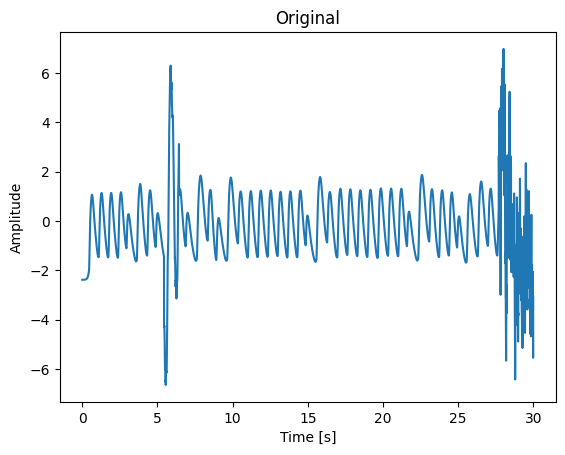

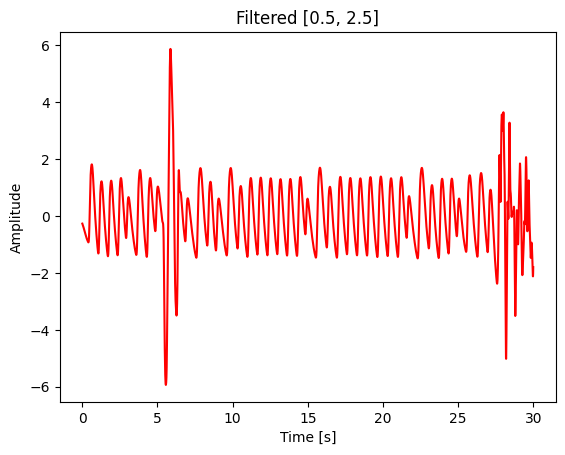

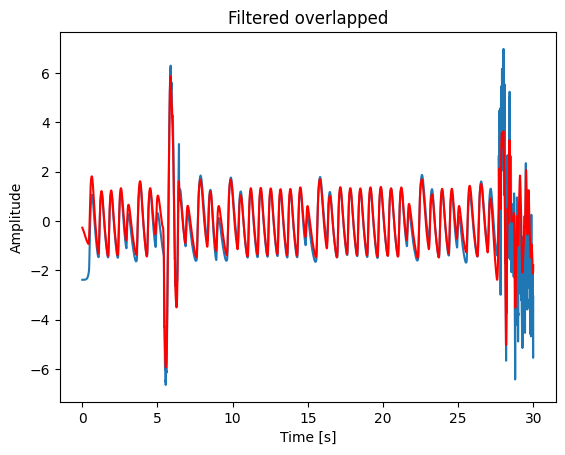

In [8]:
#Plot only the first 30 seconds 
signal_temp_reduced = signal_temp[:(128*30)]
t3 = np.arange(0, signal_temp_reduced.shape[0]/fs, 1/fs) 
plot_signal(t3, signal_temp_reduced, 'C0', 'Original')

#Plot only the first 30 seconds of the preprocessed
filt_red = filtered_ppg[:(128*30)]
t3 = np.arange(0, filt_red.shape[0]/fs, 1/fs)
plot_signal(t3, filt_red, 'r', 'Filtered [0.5, 2.5]')

#Filtered over original
#Plot only the first 30 seconds of the preprocessed
fig3, axs = plt.subplots()
axs.set_title("Filtered overlapped")
axs.plot(t3, signal_temp_reduced, color='C0')
axs.plot(t3, filt_red, color='r')
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()


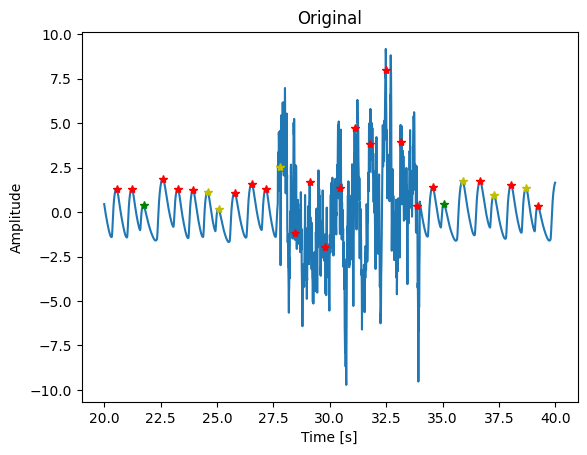

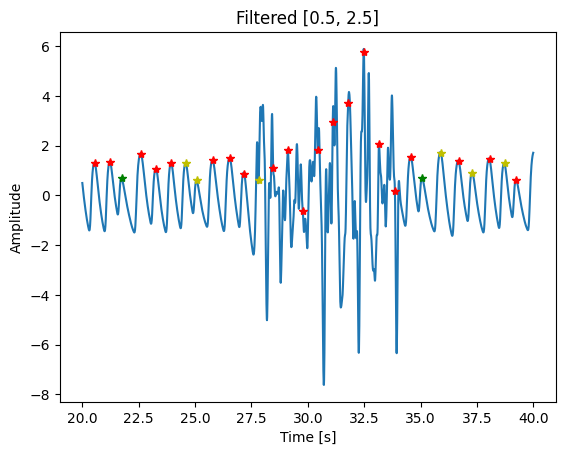

In [9]:
#Plot peaks positions

starting_time = 20
end_time = 40
time = np.arange(starting_time, end_time, 1/fs) # strat from 0 until the end of the signal_temp, with points distant by period 1/fs


fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, signal_temp[(128*starting_time):(128*end_time)], color='C0')

i = 0
peak_pos = speaks_128[0][0]
components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0]:
    if(peak_pos >= components_out_of_interval+1 and peak_pos <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak_pos - components_out_of_interval],signal_temp[peak_pos],'*',color='r')
               
            case 'S':
                axs.plot(time[peak_pos - components_out_of_interval],signal_temp[peak_pos],'*',color='g')
                
            case 'V':
                axs.plot(time[peak_pos - components_out_of_interval],signal_temp[peak_pos],'*',color='y')
    i += 1
    if(i< len(annotations_128[0])):
        peak_pos = speaks_128[0][i]
    
#axs.plot(peakS/fs,signal_temp[0:20*128][posS],'*',color='r')
#axs.plot(peakV/fs,signal_temp[0:20*128][posV],'*',color='y')
axs.set_title("Original")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

#############################################################################################################

fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, filtered_ppg[(128*starting_time):(128*end_time)], color='C0')

i = 0
peak_pos = speaks_128[0][0]
components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0]:
    if(peak_pos >= components_out_of_interval+1 and peak_pos <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='r')
               
            case 'S':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='g')
                
            case 'V':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='y')
    i += 1
    if(i< len(annotations_128[0])):
        peak_pos = speaks_128[0][i]
    
axs.set_title("Filtered [0.5, 2.5]")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()


In [10]:
from dotmap import DotMap
sig = DotMap()
sig.filt_sig=filtered_ppg
sig.v=filtered_ppg
sig.filt_d1=filtered_ppg
sig.filt_d2=filtered_ppg
sig.filt_d3=filtered_ppg
sig.fs=128
sig.ppg

DotMap(_ipython_display_=DotMap(), _repr_mimebundle_=DotMap())

# Extract fiducials

In [11]:
from pyPPG import PPG, Fiducials, Biomarkers
import pyPPG.fiducials as FP

a = PPG(s=sig)
fpex = FP.FpCollection(s=a)
fiducials = fpex.get_fiducials(s=a)

fiducials

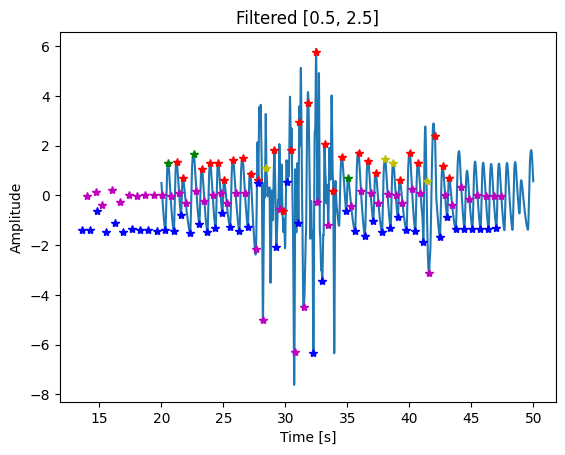

In [15]:
starting_time = 20
end_time = 50
time = np.arange(starting_time, end_time, 1/fs) 
fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, filtered_ppg[(128*starting_time):(128*end_time)], color='C0')

i = 20
peak_pos = speaks_128[0][0]
components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0][0:45]:
    if(peak_pos >= components_out_of_interval+1 and peak_pos <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='r')
            
               
            case 'S':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='g')
                
            case 'V':
                axs.plot(time[peak_pos - components_out_of_interval],filtered_ppg[peak_pos],'*',color='y')
    
    axs.plot(fiducials['dn'].iloc[i]/fs,filtered_ppg[fiducials['dn'].iloc[i]],'*',color='m')
    axs.plot(fiducials['on'].iloc[i]/fs,filtered_ppg[fiducials['on'].iloc[i]],'*',color='b')
    i += 1      
    
    if(i< len(annotations_128[0])):
        peak_pos = speaks_128[0][i]
        

axs.set_title("Filtered [0.5, 2.5]")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()

In [16]:
def check_speak(speak,signal):
    temp=speak
    prec=speak-1
    post=speak+1
    if(signal[temp]<signal[post] and signal[temp]>signal[prec]):
        while (signal[temp]<signal[post]):
            temp=post
            post+=1
    elif(signal[temp]>signal[post] and signal[temp]<signal[prec]):
        while (signal[temp]<signal[prec]):
            temp=prec
            prec-=1
            
    return temp

speaks_check = []
for i in range(len(speaks_128[0])):
    speaks_check.append(int(check_speak(speaks_128[0][i],filtered_ppg)[0]))
       

In [17]:
def find_on(peaks,fiducials):
    on=[]
    for p in range(len(peaks)):
        arr=[]
        arr=fiducials['on'].loc[fiducials['sp']>np.squeeze(peaks[p])-5]
        if(isinstance(np.squeeze(arr[0:1]), np.int64)):
            on.append(np.squeeze(arr[0:1]))
        else:
            on.append(None)
    return on 

on = find_on(speaks_check,fiducials)


In [18]:
def find_dn(peaks,fiducials):
    dn=[]
    for p in range(len(peaks)):
        arr=[]
        arr=fiducials['dn'].loc[fiducials['sp']>np.squeeze(speaks_check[p])-5]
        if(isinstance(np.squeeze(arr[0:1]), np.int64)):
            dn.append(np.squeeze(arr[0:1]))
        else:
            dn.append(None)
        
    return dn 

dn = find_dn(speaks_check,fiducials)

In [19]:
'''
starting_time = 0
end_time = 20
time = np.arange(starting_time, end_time, 1/fs) # strat from 0 until the end of the signal_temp, with points distant by period 1/fs


fig, axs = plt.subplots()
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
axs.plot(time, filtered_ppg[(128*starting_time):(128*end_time)], color='C0')

i = 0
peak = speaks_check[0]
o=on[0]
d=dn[0]

components_out_of_interval = (128*starting_time)-1

for ann in annotations_128[0]:
    if(peak >= components_out_of_interval+1 and peak <= (128*end_time)):
        match ann:
            case 'N':
                axs.plot(time[peak - components_out_of_interval],filtered_ppg[peak],'*',color='r')
                #axs.plot(time[o-components_out_of_interval],filtered_ppg[o],'*',color='m') 
                
               
            case 'S':
                axs.plot(time[peak - components_out_of_interval],filtered_ppg[peak],'*',color='g')
                #axs.plot(time[o-components_out_of_interval],filtered_ppg[o],'*',color='m') 
                
                
            case 'V':
                axs.plot(time[peak - components_out_of_interval],filtered_ppg[peak],'*',color='y')
                #axs.plot(time[o-components_out_of_interval],filtered_ppg[o],'*',color='m') 
    
    axs.plot(time[o-components_out_of_interval],filtered_ppg[o],'*',color='m') 
    axs.plot(time[d-components_out_of_interval],filtered_ppg[d],'*',color='k') 
    i += 1
    if(i<len(annotations_128[0])):
        peak = speaks_check[i]
        o = on[i]
        d = dn[i]
        
    
    
#axs.plot(peakS/fs,signal_temp[0:20*128][posS],'*',color='r')
#axs.plot(peakV/fs,signal_temp[0:20*128][posV],'*',color='y')
axs.set_title("Original")
axs.set_xlabel("Time [s]")
axs.set_ylabel("Amplitude")
plt.show()
'''

'\nstarting_time = 0\nend_time = 20\ntime = np.arange(starting_time, end_time, 1/fs) # strat from 0 until the end of the signal_temp, with points distant by period 1/fs\n\n\nfig, axs = plt.subplots()\n#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])\naxs.plot(time, filtered_ppg[(128*starting_time):(128*end_time)], color=\'C0\')\n\ni = 0\npeak = speaks_check[0]\no=on[0]\nd=dn[0]\n\ncomponents_out_of_interval = (128*starting_time)-1\n\nfor ann in annotations_128[0]:\n    if(peak >= components_out_of_interval+1 and peak <= (128*end_time)):\n        match ann:\n            case \'N\':\n                axs.plot(time[peak - components_out_of_interval],filtered_ppg[peak],\'*\',color=\'r\')\n                #axs.plot(time[o-components_out_of_interval],filtered_ppg[o],\'*\',color=\'m\') \n                \n               \n            case \'S\':\n                axs.plot(time[peak - components_out_of_interval],filtered_ppg[peak],\'*\',color=\'g\')\n              

Features Extraction

In [20]:
df_features = pd.DataFrame({
        #Execute -1 because matlab start counting from 1
        'peak_pos': speaks_check,
        'onset' : on,
        'diastolic_notch' : dn
    })

print(df_features)

      peak_pos  onset  diastolic_notch
0           81    0.0            105.0
1          163  136.0            188.0
2          245  218.0            270.0
3          328  300.0            353.0
4          392  373.0            421.0
...        ...    ...              ...
2598    229809    NaN              NaN
2599    229898    NaN              NaN
2600    229986    NaN              NaN
2601    230048    NaN              NaN
2602    230155    NaN              NaN

[2603 rows x 3 columns]


In [21]:
peak_pos = df_features['peak_pos']
mask_onset = df_features['onset'].notnull()
mask_notch = df_features['diastolic_notch'].notnull()


df_features['asp'] = filtered_ppg[peak_pos]
df_features.loc[mask_onset, 'adp'] = filtered_ppg[df_features.loc[mask_onset, 'onset'].astype(int)]
df_features.loc[mask_notch, 'adn'] = filtered_ppg[df_features.loc[mask_notch, 'diastolic_notch'].astype(int)]

df_features['rp'] = df_features['adp']/df_features['asp']
df_features['d1'] = df_features['asp'] - df_features['adn']
df_features['d2'] = df_features['adp'] - df_features['adn']
df_features['rd'] = df_features['d1']/df_features['d2']
#AMSP TODO
df_features['rn'] = df_features['adn']/df_features['asp']


In [22]:
df_features

,peak_pos,onset,diastolic_notch,asp,adp,adn,rp,d1,d2,rd,rn
0,81,0.0,105.0,1.808161,-0.270780,0.311636,-0.149755,1.496525,-0.582417,-2.569510,0.172350
1,163,136.0,188.0,1.213840,-1.319372,-0.102393,-1.086940,1.316233,-1.216978,-1.081559,-0.084355
2,245,218.0,270.0,1.235106,-1.416667,-0.049955,-1.147000,1.285061,-1.366713,-0.940257,-0.040446
3,328,300.0,353.0,1.326488,-1.380639,0.091150,-1.040823,1.235338,-1.471790,-0.839344,0.068716
4,392,373.0,421.0,0.654349,-0.776687,-0.294765,-1.186962,0.949114,-0.481922,-1.969433,-0.450470
...,...,...,...,...,...,...,...,...,...,...,...
2598,229809,NaN,NaN,2.778281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2599,229898,NaN,NaN,2.180678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2600,229986,NaN,NaN,1.575573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2601,230048,NaN,NaN,-0.154780,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Amplitude features
- ASP: amplitude systolic peak 
- ADP: amplitude onset peak
- ADN: amplitude dycrotic notch
- RP: ADP/ASP --> augmentation index
- D1: ASP-ADN
- D2: ADP-ADN
- RD: D1/D2
- AMSP: amplitude max slope point (massimo derivata prima)
- RN: ADN/ASP
Time-related feature
- TP: time interval from DP to SP
- T1: time interval from DN to SP
- T2: time interval from DP to DN
- pi2pi_pr: time interval from SPi-1 to SPi
- pi2pi_po time interval from SPi to SPi+1
- ST: 1/TP --> stiffness of large arteries
Area-related feature
- Area: area between 2 systolic peaks

In [23]:
#Compact signals 128 info in a unique dataframe
signals_128_dataframes = []

for i in range(len(ppgs_128)):
    df_annotations = pd.DataFrame({
        #Execute -1 because matlab start counting from 1
        'peak_pos': np.ravel(speaks_128[i]) -1,
        'peak_nature': np.ravel(annotations_128[i])
    })
    
    df_values = pd.DataFrame({
        'PPG_Value': np.ravel(ppgs_128[i]),
    })
    
    # Merge DataFrames based on row positions
    merged_df = pd.merge(df_values, df_annotations, left_index=True, right_on='peak_pos', how='left')
    
    #Set isPeak true if that pos is a peak
    merged_df['isPeak'] = ~merged_df['peak_nature'].isnull()
    
    # Drop the 'peak_pos' column
    merged_df.drop(columns=['peak_pos'], inplace=True)
    
    # Reorder columns to have 'isPeak' in the second position
    merged_df = merged_df[['PPG_Value', 'isPeak', 'peak_nature']]
    
    # Reset index
    merged_df.reset_index(drop=True, inplace=True)
    signals_128_dataframes.append(merged_df)


In [24]:
#Compact signals 250 info in a unique dataframe
signals_250_dataframes = []

for i in range(len(ppgs_250)):
    df_annotations = pd.DataFrame({
        #Execute -1 because matlab start counting from 1
        'peak_pos': np.ravel(speaks_250[i]) -1,
        'peak_nature': np.ravel(annotations_250[i])
    })
    
    df_values = pd.DataFrame({
        'PPG_Value': np.ravel(ppgs_250[i]),
    })
    
    # Merge DataFrames based on row positions
    merged_df = pd.merge(df_values, df_annotations, left_index=True, right_on='peak_pos', how='left')
    
    #Set isPeak true if that pos is a peak
    merged_df['isPeak'] = ~merged_df['peak_nature'].isnull()
    
    # Drop the 'peak_pos' column
    merged_df.drop(columns=['peak_pos'], inplace=True)
    
    # Reorder columns to have 'isPeak' in the second position
    merged_df = merged_df[['PPG_Value', 'isPeak', 'peak_nature']]
    
    # Reset index
    merged_df.reset_index(drop=True, inplace=True)
    signals_250_dataframes.append(merged_df)
